<a href="https://colab.research.google.com/github/abdullahyasser0/CSAI-253/blob/main/Assignment_2_CSAI_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [95]:
def linear_function(x, slope, intercept):
    return slope * x + intercept

slope = 2
intercept = 3

x_values = range(1, 100)

y_values = [linear_function(x, slope, intercept+random.randrange(-30,80)) for x in x_values]

data = {'x': x_values, 'y': y_values}
df = pd.DataFrame(data)

In [96]:
df

,x,y
0,1,35
1,2,-3
2,3,-9
3,4,58
4,5,69
...,...,...
94,95,231
95,96,247
96,97,275
97,98,213


**Convert to NP array**

In [59]:
x=df['x'].to_numpy()
y=df['y'].to_numpy()

array([1, 2, 3, 4, 5])

**Add col of ones for the constent**

In [13]:
ones_column = np.ones((x.shape[0], 1), dtype=x.dtype)
reshped_x=x.reshape(-1, 1)
x_ready = np.concatenate((ones_column,reshped_x), axis=1)
x_ready

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5]])

In [15]:
x_T = x_ready.transpose() #Get the X transpose

xx_T=np.matmul(x_T,x_ready)#  x transpose multiply x

xfinalInv = np.linalg.inv(xx_T) # x*x_transpose inverse

pseudoInv=np.matmul(xfinalInv,x_T) # the pseudo inverse

w=np.matmul(pseudoInv,y) # the weights


array([[1, 1, 1, 1, 1],
       [1, 2, 3, 4, 5]])

In [35]:
def MSSE(df,X,Y):
  x=df[X].to_numpy()
  y=df[Y].to_numpy()
  ones_column = np.ones((x.shape[0], 1), dtype=x.dtype)
  reshped_x=x.reshape(-1, 1)
  x_ready = np.concatenate((ones_column,reshped_x), axis=1)
  x_T = x_ready.transpose()
  xx_T=np.matmul(x_T,x_ready)
  xfinalInv = np.linalg.inv(xx_T)
  pseudoInv=np.matmul(xfinalInv,x_T)
  w=np.matmul(pseudoInv,y)
  return w

In [77]:
MSSE(df,'x','y')

array([7.2, 1.6])

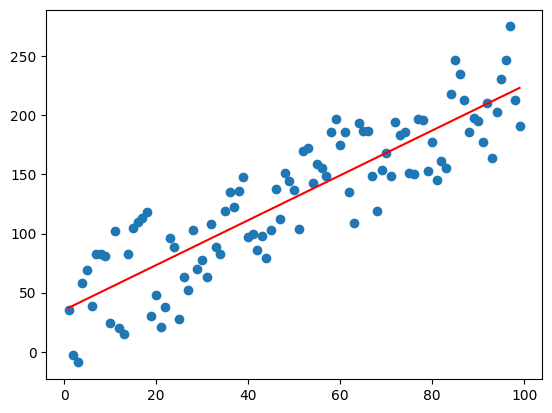

In [97]:
slope=MSSE(df,'x','y')[1]
intercept = MSSE(df,'x','y')[0]
x_line = np.linspace(df["x"].min(), df["x"].max(), 100)
y_line = slope * x_line + intercept

plt.scatter(df["x"], df["y"])
plt.plot(x_line, y_line, color='red', label=f'Random Line: y = {slope}x + {intercept}')
plt.show()